# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [57]:
import numpy as np 
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
import seaborn as sns
import os

In [58]:
arch_enhance = pd.read_csv('twitter-archive-enhanced.csv')

In [59]:
arch_enhance.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [60]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [61]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [62]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer



3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [63]:
with open('tweet-json.txt') as json_f:
    tweets_json = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in json_f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        tweets_json = tweets_json.append(data,ignore_index=True)
tweets_json.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual Assessment

In [64]:
arch_enhance

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [65]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [66]:
tweets_json

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


#### Programmatic Assessment

In [67]:
arch_enhance.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [68]:
arch_enhance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [69]:
arch_enhance.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None,pupper,None
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,None,None,None,None
570,801854953262350336,8.018543e+17,1.185634e+07,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2000,672488522314567680,NaN,NaN,2015-12-03 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jackie. She was all ready to go out, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672488522...,10,10,Jackie,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1244,711743778164514816,NaN,NaN,2016-03-21 02:38:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's calculating the best case...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711743778...,11,10,Roosevelt,None,None,None,None
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brockly. He's an uber driver. Falls as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,None,None,None,None
1411,698989035503689728,NaN,NaN,2016-02-14 21:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He does toe touches in his sle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698989035...,13,10,Oliver,None,None,None,None
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,None,None,None,None


In [70]:
arch_enhance.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [71]:
arch_enhance['in_reply_to_status_id'].isnull().sum()

2278

In [72]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False
1066,715696743237730304,https://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg,1,Staffordshire_bullterrier,0.427836,True,pug,0.221409,True,French_bulldog,0.132135,True
603,679844490799091713,https://pbs.twimg.com/media/CW9K9VeVAAE0j-x.jpg,1,Airedale,0.903832,True,Border_terrier,0.034713,True,toy_poodle,0.021378,True
1073,716802964044845056,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,2,malinois,0.619577,True,Leonberg,0.118089,True,bull_mastiff,0.066508,True
1632,805826884734976000,https://pbs.twimg.com/ext_tw_video_thumb/80582...,1,Siberian_husky,0.248926,True,American_Staffordshire_terrier,0.098313,True,Eskimo_dog,0.080188,True
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,Norfolk_terrier,0.129114,True,Pomeranian,0.120822,True
1753,824663926340194305,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,1,English_setter,0.526488,True,golden_retriever,0.402815,True,Irish_setter,0.034418,True


In [73]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [74]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [75]:
predictions.duplicated().sum()

0

In [76]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [77]:
tweets_json.sample(10)

,tweet_id,favorites,retweets
447,819006400881917954,49960,21794
1184,718540630683709445,2730,1137
1133,728409960103686147,5383,2269
1988,672640509974827008,1032,348
2238,667924896115245057,318,119
2244,667878741721415682,409,127
1877,675015141583413248,2918,1335
1092,736736130620620800,4736,1972
394,825535076884762624,56413,19669
2240,667911425562669056,523,329


In [78]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null object
retweets     2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [79]:
tweets_json.duplicated().sum()

0

### Quality issues

arch_enhance table

1.There are 6 columns which have many missing values.

2.Remove some columns which are NaN values.

3.Incorrect dogs name with "a", "an", "such","the", "very"...

4.tweet_ id, the timestap,rating_numerato and rating_denominator are not correct datatype.

5.In the column rating_numerato and rating_deminator it is needed to correct some decimals.

Predictions table

6.The dataypes of some column are not correct.

7.the datatype of twitter_id should be converted.

8.It is needed to remove '_' ''and make title of data upper in columns p1, p2, p3.

tweets_json table

9.the datatype of favorites and retweets should be converted

### Tidiness issues
1.doggo, floofer, pupper, puppo in df1_clean should be in one column.

2.There are three different dataframe which need join or merge with each other.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [80]:
# Make copies of original pieces of data
twitter_enhanced_clean = arch_enhance.copy()
predictions_clean = predictions.copy()
tweets_json_clean = tweets_json.copy()

### Issue #1: We need to first solve the quality issue of data

#### Define: We drop some useless columns from our data

#### Code

In [86]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [87]:
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean.retweeted_status_id.isnull()]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean.retweeted_status_user_id.isnull()]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean.retweeted_status_timestamp.isnull()]

In [88]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [89]:
df1_clean = twitter_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis=1)

#### Test

In [90]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


#### Define: There are some incorrect dog names with a, an, such, the, very

#### Code

In [91]:
df1_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
858            Alfie
367            Alfie
2238           Alfie
1616           Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
2001           light
1095             mad
852               my
988              not
335              not
1747      officially
1206             old
369              one
924              one
1936             one
993              one
193            quite
169            quite
2326           quite
2030           space
22              such
1797         

In [92]:
df1_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [93]:
df1_clean.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very', 'None'],np.NaN, inplace =True)
df1_clean['name'].fillna(value="Unknown", inplace=True)

#### Test

In [94]:
df1_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
858            Alfie
2238           Alfie
367            Alfie
1616           Alfie
51              Alfy
1701           Alice
201            Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
986          Winston
816          Winston
1243         Winston
1829         Winston
407          Winston
877           Wishes
174            Wyatt
410            Wyatt
1451           Wyatt
1378            Yoda
622             Yogi
43              Yogi
1409           Yukon
1332            Zara
2206            Zeek
17              Zeke
181          

In [95]:
df1_clean.name.value_counts()


Unknown     780
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Lola          8
Daisy         7
Toby          7
Jax           6
Bailey        6
Stanley       6
Oscar         6
Bo            6
Koda          6
Bella         6
Milo          5
Buddy         5
Rusty         5
Chester       5
Bentley       5
Scout         5
Leo           5
Louis         5
Dave          5
Duke          4
Jerry         4
           ... 
Al            1
Lugan         1
Philbert      1
Gidget        1
Berkeley      1
Gromit        1
Jessifer      1
Tito          1
Sparky        1
Lulu          1
Eevee         1
Vinscent      1
Bobby         1
Tove          1
Banditt       1
Juckson       1
Tino          1
Skye          1
Carly         1
Lacy          1
Rupert        1
Snoop         1
Darby         1
Brandi        1
Mo            1
Chuq          1
Blanket       1
Pippin        1
Clybe         1
Maks          1
Name: name, Length: 934,

#### Define: We will convert some incorrect datatypes to correct datatypes like tweet_id, timestamp,rating numerator, rating_denominator.

#### Code

In [96]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [97]:
df1_clean['tweet_id'] = df1_clean.tweet_id.astype('object')
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df1_clean['rating_numerator'] = df1_clean.rating_numerator.astype('float')
df1_clean['rating_denominator'] = df1_clean.rating_denominator.astype('float')

#### Test

In [98]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 203.9+ KB


#### Define: I will correct decimals in column rating_numerator and rating_deminator.

#### Code

In [99]:
df1_clean.loc[(df1_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df1_clean.loc[(df1_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.8
df1_clean.loc[(df1_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.3
df1_clean.loc[(df1_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df1_clean.loc[(df1_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.3

#### Test

In [100]:

with pd.option_context('max_colwidth', 200):
    display(df1_clean[df1_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.8,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.3,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.3,10.0


#### Define: We need to convert some columns' datatypes in data prediction.

#### Code:

In [101]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [102]:
predictions_clean['tweet_id'] = predictions_clean.tweet_id.astype('object')
predictions_clean['p1_conf'] = predictions_clean.p1_conf.astype('int64')
predictions_clean['p2_conf'] = predictions_clean.p2_conf.astype('int64')
predictions_clean['p3_conf'] = predictions_clean.p3_conf.astype('int64')

#### Test

In [103]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null int64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null int64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null int64
p3_dog      2075 non-null bool
dtypes: bool(3), int64(4), object(5)
memory usage: 152.1+ KB


#### Define: I will remove and make title of data upper in columns p1, p2, p3.

#### Code

In [104]:
predictions_clean['p1'] = predictions_clean['p1'].str.replace('_', " ")
predictions_clean['p2'] = predictions_clean['p2'].str.replace('_', " ")
predictions_clean['p3'] = predictions_clean['p3'].str.replace('_', " ")


In [105]:
predictions_clean['p1'] = predictions_clean['p1'].str.title()
predictions_clean['p2'] = predictions_clean['p2'].str.title()
predictions_clean['p3'] = predictions_clean['p3'].str.title()

#### Test

In [106]:
predictions_clean[["p1","p2"]].head()

,p1,p2
0,Welsh Springer Spaniel,Collie
1,Redbone,Miniature Pinscher
2,German Shepherd,Malinois
3,Rhodesian Ridgeback,Redbone
4,Miniature Pinscher,Rottweiler


#### Define: In the data of tweets_json the datatype of favorites and retweets should be changed.

#### Code

In [107]:
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null object
retweets     2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [108]:
tweets_json_clean['favorites'] = tweets_json_clean.favorites.astype('int64')
tweets_json_clean['retweets'] = tweets_json_clean.retweets.astype('int64')

#### Test

In [109]:
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #2: Tidiness of dataset we need to merge all three dataframes in one.

#### Define: doggo, floofer, pupper, puppo in df1_clean should be in one column.

#### Code

In [110]:
dogs = ['doggo', 'floofer', 'pupper', 'puppo']
for stage_dogs in dogs:
    df1_clean[stage_dogs] = df1_clean[stage_dogs].apply(lambda x: np.NaN if x == 'None' else x)
    
df1_clean['stage_dogs'] = df1_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
df1_clean['stage_dogs'] = df1_clean['stage_dogs'].apply(lambda x: x.replace('nan', ''))
df1_clean['stage_dogs']= df1_clean['stage_dogs'].apply(lambda x: np.NaN if x == '' else x)

df1_clean['stage_dogs'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [111]:
cols_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
df1_clean.drop(cols_to_drop, axis=1, inplace=True)

#### Test

In [112]:
df1_clean['stage_dogs'].sample(10)

1152    pupper
1030     doggo
263        NaN
1774       NaN
1992    pupper
747        NaN
2076       NaN
1461       NaN
1678       NaN
1395    pupper
Name: stage_dogs, dtype: object

In [113]:
df1_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage_dogs
300,836753516572119041,2017-03-01 01:42:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,12.0,10.0,Meera,doggo
1553,688908934925697024,2016-01-18 02:21:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarence. He does parkour. 8/10 very tale...,8.0,10.0,Clarence,NaN
1927,674051556661161984,2015-12-08 02:23:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She knits. Specializes in tobogg...,10.0,10.0,Lucy,NaN
2200,668655139528511488,2015-11-23 04:59:42,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,11.0,10.0,Winifred,NaN
1719,680161097740095489,2015-12-24 23:00:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,12.0,10.0,Goliath,NaN


In [114]:
df1_clean['stage_dogs'].value_counts()

pupper           224
doggo             75
puppo             24
doggo pupper      10
floofer            9
doggo floofer      1
doggo puppo        1
Name: stage_dogs, dtype: int64

#### Define: we will merge three dataframes.

#### Code 

In [115]:
df = pd.merge(df1_clean, predictions_clean, on = 'tweet_id', how = 'inner')
df = pd.merge(df, tweets_json_clean, on = 'tweet_id', how = 'inner')

#### Test

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
stage_dogs            306 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null int64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null int64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null int64
p3_dog                1994 non-null bool
favorites             1994 non-null int64
retweets              1994 non-null

In [117]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage_dogs,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0,False,Bagel,0,False,Banana,0,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0,True,Pekinese,0,True,Papillon,0,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0,True,Malamute,0,True,Kelpie,0,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0,False,Labrador Retriever,0,True,Spatula,0,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0,True,English Springer,0,True,German Short-Haired Pointer,0,True,41048,9774


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [118]:
df.to_csv('twitter_archive_master.csv', 
            index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [119]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage_dogs,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0,False,Bagel,0,False,Banana,0,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0,True,Pekinese,0,True,Papillon,0,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0,True,Malamute,0,True,Kelpie,0,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0,False,Labrador Retriever,0,True,Spatula,0,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0,True,English Springer,0,True,German Short-Haired Pointer,0,True,41048,9774


In [120]:
df.rating_numerator.mean()

12.237161484453361

In [121]:
df.rating_denominator.mean()

10.532096288866599

In [122]:
df.name.value_counts()

Unknown      640
Charlie       11
Lucy          10
Oliver        10
Cooper        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Toby           7
Daisy          7
Lola           7
Stanley        6
Bo             6
Jax            6
Bella          6
Koda           6
Rusty          5
Louis          5
Buddy          5
Oscar          5
Bailey         5
Dave           5
Leo            5
Milo           5
Scout          5
Chester        5
Reggie         4
Archie         4
Brody          4
            ... 
Carll          1
Buddah         1
Buckley        1
Darla          1
Bayley         1
Lacy           1
Pippin         1
Augie          1
Juckson        1
Kallie         1
Genevieve      1
Lizzie         1
Lulu           1
Eevee          1
Vinscent       1
Bobby          1
Tove           1
Banditt        1
Tino           1
Blanket        1
Skye           1
Sparky         1
Carly          1
Rupert         1
Snoop          1
Darby          1
Brandi         1
Mo            

In [123]:
df.p1.value_counts()

Golden Retriever             139
Labrador Retriever            95
Pembroke                      88
Chihuahua                     79
Pug                           54
Chow                          41
Samoyed                       40
Toy Poodle                    38
Pomeranian                    38
Malamute                      29
Cocker Spaniel                27
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            22
Seat Belt                     21
German Shepherd               20
Siberian Husky                20
Staffordshire Bullterrier     19
Eskimo Dog                    18
Teddy                         18
Maltese Dog                   18
Shetland Sheepdog             18
Shih-Tzu                      17
Cardigan                      17
Rottweiler                    17
Beagle                        17
Kuvasz                        16
Lakeland Terrier              16
Italian Greyhound             16
Web Site                      15
          

In [124]:
df.p2.value_counts()

Labrador Retriever                96
Golden Retriever                  82
Cardigan                          73
Chihuahua                         43
Chesapeake Bay Retriever          40
Pomeranian                        39
French Bulldog                    39
Toy Poodle                        36
Siberian Husky                    33
Miniature Poodle                  32
Cocker Spaniel                    32
Beagle                            28
Eskimo Dog                        27
Collie                            26
Pembroke                          25
Kuvasz                            24
Italian Greyhound                 22
Pekinese                          21
American Staffordshire Terrier    20
Malinois                          20
Miniature Pinscher                20
Chow                              20
Norwegian Elkhound                19
Boston Bull                       19
Toy Terrier                       19
Samoyed                           19
Staffordshire Bullterrier         18
P

In [125]:
df.p3.value_counts()

Labrador Retriever                76
Chihuahua                         57
Golden Retriever                  46
Eskimo Dog                        36
Kelpie                            33
Chow                              31
Kuvasz                            31
Beagle                            30
Staffordshire Bullterrier         30
Toy Poodle                        29
Cocker Spaniel                    29
Pekinese                          28
Pomeranian                        27
Great Pyrenees                    26
Pembroke                          26
French Bulldog                    25
Malamute                          25
Chesapeake Bay Retriever          24
American Staffordshire Terrier    23
Cardigan                          23
Pug                               21
Basenji                           20
Siberian Husky                    19
Bull Mastiff                      19
Toy Terrier                       18
Boston Bull                       17
Shetland Sheepdog                 17
B

In [126]:
df[["p1", "favorites"]].sort_values(by="favorites", ascending=False)

,p1,favorites
309,Lakeland Terrier,132810
775,Labrador Retriever,131075
58,English Springer,107956
400,Chihuahua,107015
108,French Bulldog,106827
333,Standard Poodle,95450
93,Golden Retriever,85011
402,Arabian Camel,75639
135,Angora,75193
810,Eskimo Dog,75163


### Insights:
1.Most favorite dog name is charlie.

2.Rating is abroximately is 11.

3.Most popular dog is golden retriver, But Labrador retriever is most favorite in tweeter.

### Visualization

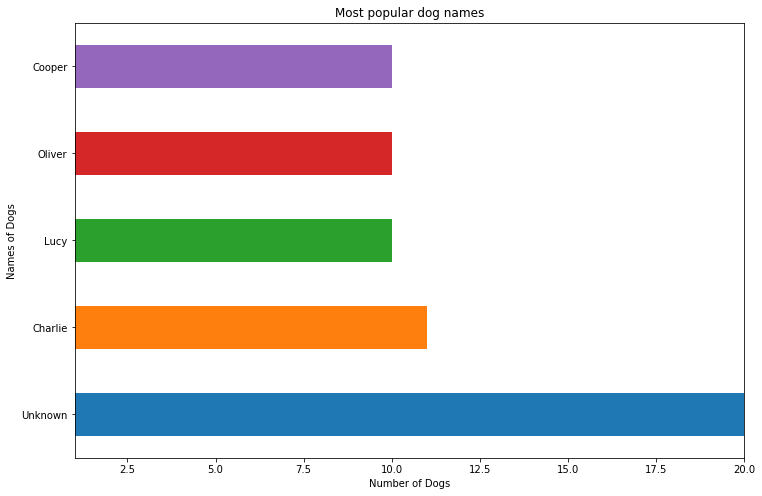

In [127]:
plt.figure(figsize=(12, 8))
dogs = df.name.value_counts().nlargest(5).plot(kind = 'barh');
dogs.set_title('Most popular dog names');
dogs.set_xlabel('Number of Dogs');
dogs.set_ylabel('Names of Dogs');
dogs.set_xlim(1, 20);

In [ ]:
plt.figure(figsize=(12, 8))
dogs = df.p1.value_counts().nlargest(10).plot(kind = 'barh');
dogs.set_title('Most popular dog names');
dogs.set_xlabel('Number of Dogs');
dogs.set_ylabel('Names of Dogs');
dogs.set_xlim(20,160);